# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_passengers.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe(include='all').T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 20, 100, df['Fare'].max()], labels=['Low', 'Medium', 'High'])

df[['Name', 'Survived_cat', 'AgeGroup', 'FareGroup', 'FamilySize']].head()

,Name,Survived_cat,AgeGroup,FareGroup,FamilySize
0,"Braund, Mr. Owen Harris",Died,YoungAdult,Low,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Survived,Adult,Medium,2
2,"Heikkinen, Miss. Laina",Survived,YoungAdult,Low,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Survived,YoungAdult,Medium,2
4,"Allen, Mr. William Henry",Died,YoungAdult,Low,1


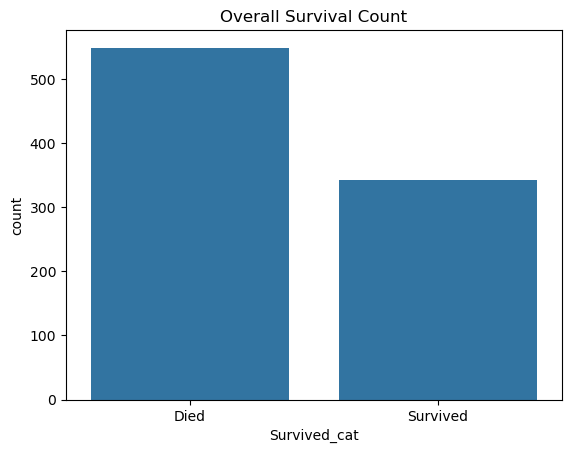

In [8]:
sns.countplot(x='Survived_cat', data=df)
plt.title('Overall Survival Count')
plt.show()

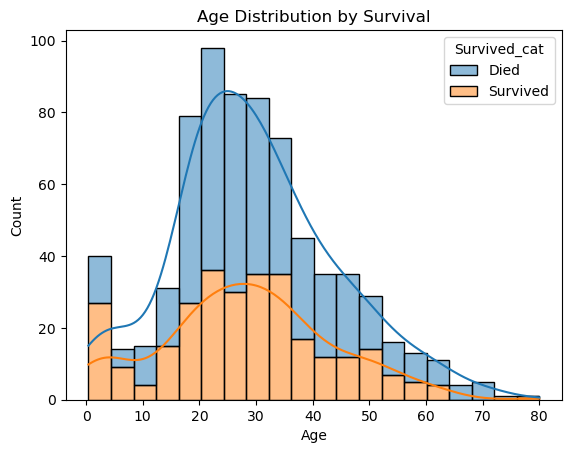

In [10]:
sns.histplot(x='Age', data=df, hue='Survived_cat', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

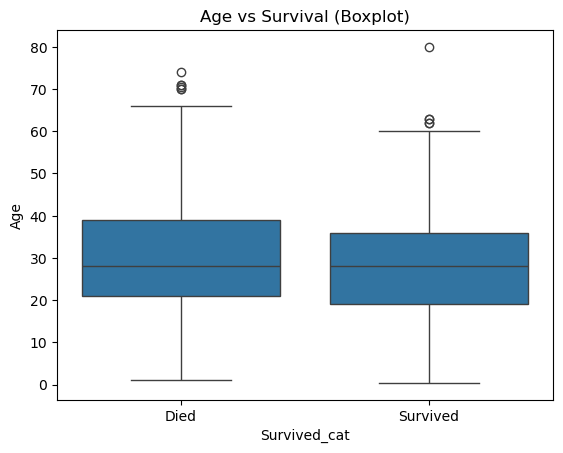

In [12]:
sns.boxplot(x='Survived_cat', y='Age', data=df)
plt.title('Age vs Survival (Boxplot)')
plt.show()

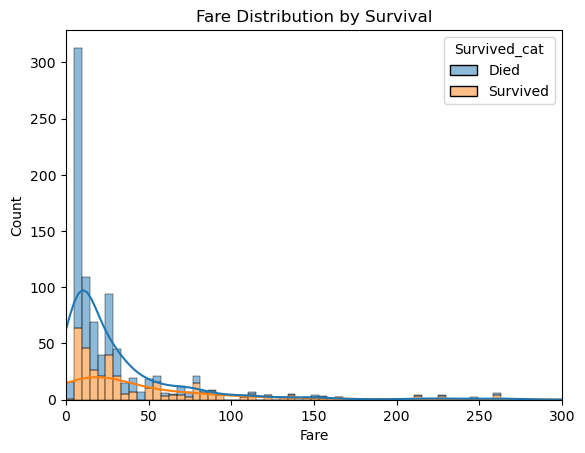

In [26]:
sns.histplot(x='Fare', data=df, hue='Survived_cat', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.xlim(0, 300)
plt.show()

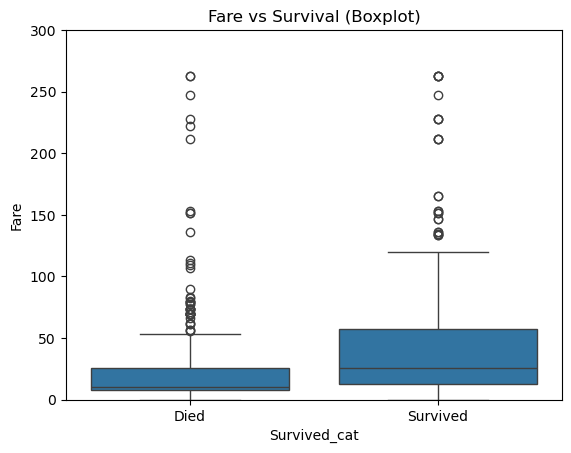

In [16]:
sns.boxplot(x='Survived_cat', y='Fare', data=df)
plt.title('Fare vs Survival (Boxplot)')
plt.ylim(0, 300)
plt.show()

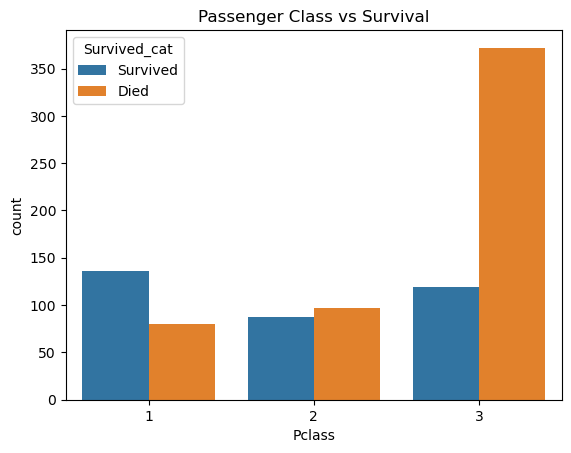

In [18]:
sns.countplot(x='Pclass', data=df, hue='Survived_cat')
plt.title('Passenger Class vs Survival')
plt.show()

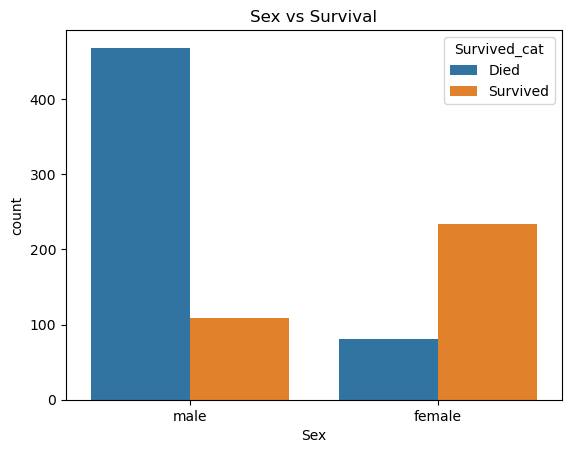

In [20]:
sns.countplot(x='Sex', data=df, hue='Survived_cat')
plt.title('Sex vs Survival')
plt.show()

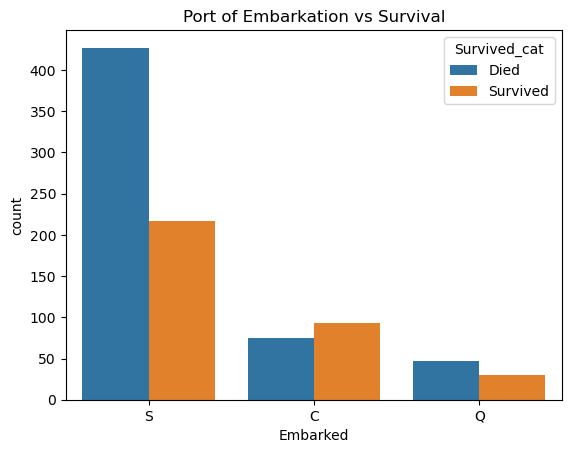

In [22]:
sns.countplot(x='Embarked', data=df, hue='Survived_cat')
plt.title('Port of Embarkation vs Survival')
plt.show()

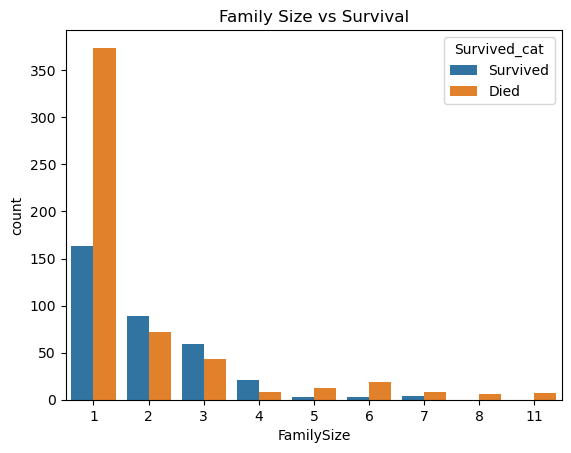

In [24]:
sns.countplot(x='FamilySize', data=df, hue='Survived_cat')
plt.title('Family Size vs Survival')
plt.show()

In [28]:
most_likely_filter = (
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    ( (df['Age'] <= 30) | (df['AgeGroup'] == 'Child') ) &
    (df['FareGroup'] == 'High') &
    (df['FamilySize'].between(2,4))
)

In [32]:
least_likely_filter = (
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['FareGroup'] == 'Low') &
    (df['FamilySize'] == 1) &
    (df['Age'].between(18,60))
)

In [34]:
most_likely_candidates = df.loc[most_likely_filter].copy()
least_likely_candidates = df.loc[least_likely_filter].copy()

In [40]:
print("Matches found - Most likely to survive:", len(most_likely_candidates))
print("Matches found - Least likely to survive:", len(least_likely_candidates))

cols = ['PassengerId', 'Name', 'Sex', 'Age', 'AgeGroup', 'Pclass', 'Fare', 'FareGroup', 'FamilySize', 'Embarked', 'Survived_cat']

print("\n--- Most likely to survive (sample up to 10) ---")
display(most_likely_candidates[cols].sort_values(by='Fare', ascending=False).head(10))

print("\n--- Least likely to survive (sample up to 10) ---")
display(least_likely_candidates[cols].sort_values(by='Age', ascending=True).head(10))

Matches found - Most likely to survive: 7
Matches found - Least likely to survive: 163

--- Most likely to survive (sample up to 10) ---


,PassengerId,Name,Sex,Age,AgeGroup,Pclass,Fare,FareGroup,FamilySize,Embarked,Survived_cat
700,701,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,Teen,1,227.5250,High,2,C,Survived
689,690,"Madill, Miss. Georgette Alexandra",female,15.0,Teen,1,211.3375,High,2,S,Survived
297,298,"Allison, Miss. Helen Loraine",female,2.0,Child,1,151.5500,High,4,S,Died
498,499,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,YoungAdult,1,151.5500,High,4,S,Died
435,436,"Carter, Miss. Lucile Polk",female,14.0,Teen,1,120.0000,High,4,S,Survived
393,394,"Newell, Miss. Marjorie",female,23.0,YoungAdult,1,113.2750,High,2,C,Survived
307,308,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,Teen,1,108.9000,High,2,C,Survived



--- Least likely to survive (sample up to 10) ---


,PassengerId,Name,Sex,Age,AgeGroup,Pclass,Fare,FareGroup,FamilySize,Embarked,Survived_cat
834,835,"Allum, Mr. Owen George",male,18.0,Teen,3,8.3000,Low,1,S,Died
675,676,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,Teen,3,7.7750,Low,1,S,Died
204,205,"Cohen, Mr. Gurshon ""Gus""",male,18.0,Teen,3,8.0500,Low,1,S,Survived
775,776,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,Teen,3,7.7500,Low,1,S,Died
688,689,"Fischer, Mr. Eberhard Thelander",male,18.0,Teen,3,7.7958,Low,1,S,Died
877,878,"Petroff, Mr. Nedelio",male,19.0,YoungAdult,3,7.8958,Low,1,S,Died
143,144,"Burke, Mr. Jeremiah",male,19.0,YoungAdult,3,6.7500,Low,1,Q,Died
372,373,"Beavan, Mr. William Thomas",male,19.0,YoungAdult,3,8.0500,Low,1,S,Died
715,716,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,YoungAdult,3,7.6500,Low,1,S,Died
566,567,"Stoytcheff, Mr. Ilia",male,19.0,YoungAdult,3,7.8958,Low,1,S,Died


In [42]:
most_selected = None
least_selected = None

if not most_likely_candidates.empty:
    most_selected = most_likely_candidates.sort_values(by='Fare', ascending=False).iloc[0]

if not least_likely_candidates.empty:
    least_selected = least_likely_candidates.sort_values(by='Age', ascending=True).iloc[0]

print("Selected MOST-LIKELY passenger (to research):")
if most_selected is not None:
    print(f"Name: {most_selected['Name']}")
    display(most_selected[cols])
else:
    print("No candidates found for this profile.")

print("\nSelected LEAST-LIKELY passenger (to research):")
if least_selected is not None:
    print(f"Name: {least_selected['Name']}")
    display(least_selected[cols])
else:
    print("No candidates found for this profile.")


Selected MOST-LIKELY passenger (to research):
Name: Astor, Mrs. John Jacob (Madeleine Talmadge Force)


PassengerId                                                   701
Name            Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Sex                                                        female
Age                                                          18.0
AgeGroup                                                     Teen
Pclass                                                          1
Fare                                                      227.525
FareGroup                                                    High
FamilySize                                                      2
Embarked                                                        C
Survived_cat                                             Survived
Name: 700, dtype: object


Selected LEAST-LIKELY passenger (to research):
Name: Allum, Mr. Owen George


PassengerId                        835
Name            Allum, Mr. Owen George
Sex                               male
Age                               18.0
AgeGroup                          Teen
Pclass                               3
Fare                               8.3
FareGroup                          Low
FamilySize                           1
Embarked                             S
Survived_cat                      Died
Name: 834, dtype: object

On August 14, 1912, she gave birth to a son with whom she was pregnant on the Titanic, and she named him after her husband, John Jacob Astor.
https://www.encyclopedia-titanica.org/titanic-survivor/madeleine-talmage-astor.html

He embarked the Titanic at Southampton and was travelling in third class (ticket number 1223 which cost 8 pounds 1s) bound for New York City to meet up with his father who had only recently taken up a position in the USA and who, coincidentally, had crossed the Atlantic aboard Olympic in February 1912, the ship's captain being Edward John Smith.
https://www.encyclopedia-titanica.org/titanic-victim/owen-george-allum.html